In [1]:
%matplotlib inline

In [2]:
# prepare data

#df = pd.read_csv('MOOC_data.txt', sep='\t')
#df['Start date'] = pd.to_numeric(df['Start date'], errors='coerce')
#df['Number enrolled'] = pd.to_numeric(df['Number enrolled'], errors='coerce')
#df['Number completed'] = pd.to_numeric(df['Number completed'], errors='coerce')
#df['% completed'] = pd.to_numeric(df['% completed'], errors='coerce')

#df2 = pd.read_excel('add_data.xlsx')
#df['Course duration'] = df2['Course duration']
#df['Number completed2'] = df2['Number completed']

#assert np.nansum(df['Number completed2'] - df['Number completed']) == 0

#df.to_pickle('MOOC_complete_data.p')

#print(df.dtypes)
#df.head()

In [3]:
import pandas as pd
df = pd.read_pickle('MOOC_complete_data.p')
df.head()

,Course,Platform,Start date,End date,Number enrolled,Number completed,% completed,Assessment type,Data source,Course duration,Number completed2
0,ABC de la Gestion de Projet,Canvas.net,2013.0,NaN,10848.0,6501.0,60.0,Auto and peer grading,https://docs.google.com/spreadsheets/d/1Ljb659...,5.0,6501
1,ABC de la Gestion de Projet,Canvas.net,NaN,NaN,3493.0,1821.0,52.1,Auto and peer grading,https://docs.google.com/spreadsheet/ccc?key=0A...,5.0,1821
2,Early Childhood Education,Open2Study,2013.0,NaN,1494.0,622.0,41.6,Auto grading only,https://www.open2study.com/research/download/575,4.0,622
3,Understanding Dementia,Desire2Learn,2013.0,NaN,9267.0,3624.0,39.1,Auto grading only,http://www.utas.edu.au/wicking/wca/mooc/data/,9.0,3624
4,HLS1X: CopyrightX,EdX,2013.0,NaN,500.0,193.0,38.6,Unknown,http://papers.ssrn.com/sol3/papers.cfm?abstrac...,12.0,193


In [4]:
def nuss_style_fun(ax, title):
    
    #remove top and right frame parts
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set left and bottom axis to grey
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    
    # set ticks to grey
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    
    #set labels to grey
    ax.yaxis.label.set_color('grey')
    ax.xaxis.label.set_color('grey') 
    
    # align axis labels with axis ends
    ax.set_xlabel(xlabel=None,
                  position=[0, 0],
                  horizontalalignment='left',
                  color='grey',
                  size=14)
    ax.set_ylabel(ylabel=None,
                  position=[0, 1],
                  horizontalalignment='right',
                  color='grey',
                  size=14)
    
    #align title
    ax.set_title(label=title,
                 loc='left',
                 color=(0.41, 0.41, 0.41),
                 size=16)
    
    return ax

In [5]:
#fig, ax = plt.subplots()
#ax = nuss_style_fun(ax=ax, title='The typical MOOC runs for {} weeks'.format(int(round(df['Course duration'].median()))))
#sns.distplot(df.loc[pd.isna(df['Course duration'])==False, 'Course duration'],
#            kde=False,
#            color='darkred',
#            ax=ax)
#ax.set(xlabel='Course duration [weeks]',
#       ylabel='Count')
df.describe()

,Start date,End date,Number enrolled,Number completed,% completed,Course duration
count,202.000000,0.0,216.000000,216.000000,216.000000,202.000000
mean,2012.990099,NaN,25318.555556,1922.004630,15.140741,6.945545
std,0.646384,NaN,35122.592921,2625.673737,11.211153,3.810434
min,2011.000000,NaN,95.000000,21.000000,0.700000,2.000000
25%,2013.000000,NaN,1188.250000,256.000000,5.025000,4.000000
50%,2013.000000,NaN,11061.000000,832.500000,12.500000,6.000000
75%,2013.000000,NaN,39819.250000,2567.250000,24.400000,8.000000
max,2015.000000,NaN,226652.000000,20000.000000,60.000000,24.000000


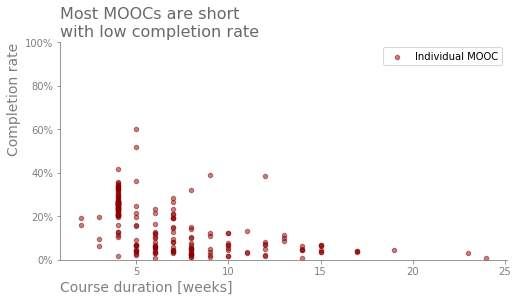

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=[8, 4])
ax = nuss_style_fun(ax=ax, title='Most MOOCs are short\nwith low completion rate')

df.plot(kind='scatter',
        x='Course duration',
        y='% completed',
        c='darkred',
        s=20,
        alpha=0.5,
       ax=ax)

ax.set(ylim=[0, 100], 
       xlabel='Course duration [weeks]',
       ylabel='Completion rate')
ax.legend(['Individual MOOC'])

# y-tick-lables as %
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

fig.savefig('MOOC_completions_pred_1.png')

## Machine Learning

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

mask = (pd.isna(df['Course duration'])==False) & (pd.isna(df['% completed'])==False)
features = df.loc[mask, ['Course duration']]
target = df.loc[mask, '% completed']

pipe = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                  ('reg', LinearRegression())])

search_space = [{'poly__degree':[1, 2, 3, 4],
                'reg':[LinearRegression()]}]

model=GridSearchCV(estimator=pipe,
                  param_grid=search_space,
                  cv=5,
                  scoring='neg_mean_absolute_error')
model.fit(X=features, 
          y=target)
print('Average prediction error: ', abs(model.best_score_))

Average prediction error:  8.37231779501398


C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


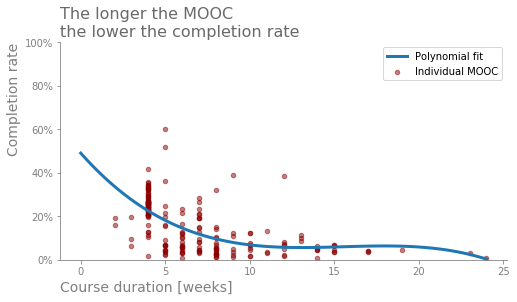

In [8]:
import numpy as np
x_fit = np.linspace(0, 
                    df.loc[:, 'Course duration'].max(),
                    100)
features_fit = pd.DataFrame({'Course duration': x_fit})
ax.plot(x_fit, 
        model.predict(features_fit),
       linewidth=3)
ax.legend(['Polynomial fit', 'Individual MOOC'])
title_str = 'The longer the MOOC\nthe lower the completion rate'
ax.set_title(label=title_str,
                 loc='left',
                 color=(0.41, 0.41, 0.41),
                 size=16)
fig.savefig('MOOC_completions_pred_2.png')
fig

In [9]:
features_aim = pd.DataFrame({'Course duration': [4, 12, 18]})
target_aim_pred = model.predict(features_aim)
print('Predicted completion rates: ', target_aim_pred)

Predicted completion rates:  [22.45697321  5.75526838  6.36904131]


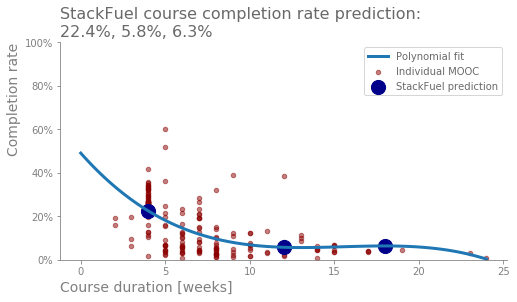

In [10]:
# 
ax.scatter(x=features_aim['Course duration'],
                y=target_aim_pred,
                c='darkblue',
                s=200)

# change font color of legend
l = ax.legend(['Polynomial fit', 'Individual MOOC', 'StackFuel prediction'])
for text in l.get_texts():
    text.set_color((0.41, 0.41, 0.41))

title_str = 'StackFuel course completion rate prediction:\n22.4%, 5.8%, 6.3%'
ax.set_title(label=title_str,
                 loc='left',
                 size=16)

fig.savefig('MOOC_completions_pred_3.png')
fig